In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy import stats
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy 
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f9450c3fe316109af6bf71862b9411a


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | new norfolk
Processing Record 2 of Set 13 | esperance
Processing Record 3 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 13 | zarechnyy
Processing Record 5 of Set 13 | kiama
Processing Record 6 of Set 13 | carnarvon
Processing Record 7 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 13 | punta arenas
Processing Record 9 of Set 13 | monteagudo
Processing Record 10 of Set 13 | lompoc
Processing Record 11 of Set 13 | hermanus
Processing Record 12 of Set 13 | kodiak
Processing Record 13 of Set 13 | umtata
Processing Record 14 of Set 13 | cherskiy
Processing Record 15 of Set 13 | bluff
Processing Record 16 of Set 13 | cidreira
Processing Record 17 of Set 13 | khani
Processing Record 18 of Set 13 | ostersund
Processing Record 19 of Set 13 | aljezur
Processing Record 20 of Set 13 | east london
Processing Record 21 of Set 13 | ejea de los c

Processing Record 35 of Set 16 | hovd
Processing Record 36 of Set 16 | kavaratti
Processing Record 37 of Set 16 | thompson
Processing Record 38 of Set 16 | minab
Processing Record 39 of Set 16 | chambersburg
Processing Record 40 of Set 16 | kita
Processing Record 41 of Set 16 | laguna
Processing Record 42 of Set 16 | viligili
City not found. Skipping...
Processing Record 43 of Set 16 | umm kaddadah
Processing Record 44 of Set 16 | san carlos de bariloche
Processing Record 45 of Set 16 | lima
Processing Record 46 of Set 16 | umm lajj
Processing Record 47 of Set 16 | mapiripan
Processing Record 48 of Set 16 | dryden
Processing Record 49 of Set 16 | yirol
City not found. Skipping...
Processing Record 50 of Set 16 | volot
Processing Record 1 of Set 17 | samarai
Processing Record 2 of Set 17 | katsuura
Processing Record 3 of Set 17 | nguiu
City not found. Skipping...
Processing Record 4 of Set 17 | bayshore gardens
Processing Record 5 of Set 17 | sola
Processing Record 6 of Set 17 | arlit
P

Processing Record 20 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 21 of Set 20 | vila velha
Processing Record 22 of Set 20 | annaka
Processing Record 23 of Set 20 | herat
Processing Record 24 of Set 20 | nemuro
Processing Record 25 of Set 20 | diamantino
Processing Record 26 of Set 20 | havoysund
Processing Record 27 of Set 20 | sawakin
Processing Record 28 of Set 20 | banyo
Processing Record 29 of Set 20 | liapades
City not found. Skipping...
Processing Record 30 of Set 20 | ous
Processing Record 31 of Set 20 | real
Processing Record 32 of Set 20 | bambanglipuro
Processing Record 33 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 34 of Set 20 | bronnoysund
Processing Record 35 of Set 20 | ayutla
Processing Record 36 of Set 20 | kintinku
Processing Record 37 of Set 20 | sakakah
Processing Record 38 of Set 20 | narasannapeta
Processing Record 39 of Set 20 | verkhnyaya inta
Processing Record 40 of Set 20 | salym
Processing Record 41 of Set 20 | pr

Processing Record 3 of Set 24 | santo domingo
Processing Record 4 of Set 24 | paracuru
Processing Record 5 of Set 24 | sitges
Processing Record 6 of Set 24 | tilichiki
Processing Record 7 of Set 24 | isla mujeres
Processing Record 8 of Set 24 | northam
Processing Record 9 of Set 24 | rio gallegos
Processing Record 10 of Set 24 | lagos
Processing Record 11 of Set 24 | dunbar
Processing Record 12 of Set 24 | pacific grove
Processing Record 13 of Set 24 | mineiros
Processing Record 14 of Set 24 | loukhi
Processing Record 15 of Set 24 | sisimiut
Processing Record 16 of Set 24 | brigantine
Processing Record 17 of Set 24 | tromso
Processing Record 18 of Set 24 | belaya gora
Processing Record 19 of Set 24 | maroantsetra
Processing Record 20 of Set 24 | odweyne
Processing Record 21 of Set 24 | mugan
Processing Record 22 of Set 24 | huarmey
Processing Record 23 of Set 24 | san cristobal
Processing Record 24 of Set 24 | roald
Processing Record 25 of Set 24 | erzin
Processing Record 26 of Set 24 

In [7]:
len(city_data)

573

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,55.40,62,90,8.05,AU,2020-10-31 17:36:00
1,Esperance,-33.87,121.90,73.40,28,100,14.99,AU,2020-10-31 17:33:55
2,Zarechnyy,53.20,45.19,42.98,84,94,3.69,RU,2020-10-31 17:43:46
3,Kiama,-34.68,150.87,62.01,93,70,3.00,AU,2020-10-31 17:43:46
4,Carnarvon,-24.87,113.63,68.00,88,40,5.82,AU,2020-10-31 17:37:07
5,Punta Arenas,-53.15,-70.92,53.60,66,0,2.24,CL,2020-10-31 17:37:57
6,Monteagudo,-19.82,-63.98,82.40,26,20,3.36,BO,2020-10-31 17:43:46
7,Lompoc,34.64,-120.46,62.60,62,1,5.82,US,2020-10-31 17:37:37
8,Hermanus,-34.42,19.23,61.00,70,0,4.00,ZA,2020-10-31 17:36:47
9,Kodiak,57.79,-152.41,32.00,88,1,8.05,US,2020-10-31 17:38:00


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604166264.3791401

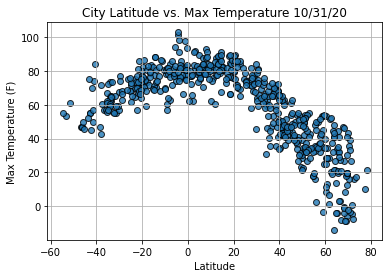

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

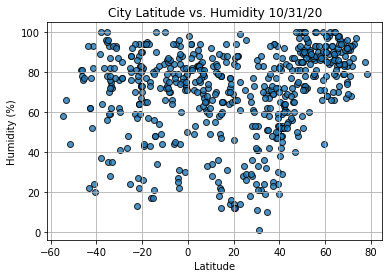

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

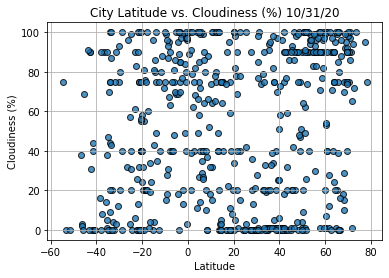

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

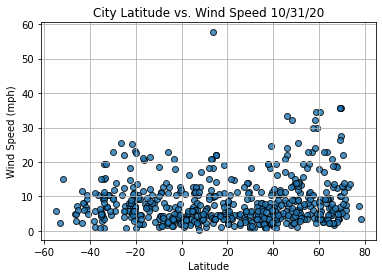

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Zarechnyy,53.20,45.19,42.98,84,94,3.69,RU,2020-10-31 17:43:46
7,Lompoc,34.64,-120.46,62.60,62,1,5.82,US,2020-10-31 17:37:37
9,Kodiak,57.79,-152.41,32.00,88,1,8.05,US,2020-10-31 17:38:00
11,Cherskiy,68.75,161.30,8.15,88,92,3.49,RU,2020-10-31 17:33:55
14,Khani,41.96,42.96,62.60,72,75,4.70,GE,2020-10-31 17:43:47
...,...,...,...,...,...,...,...,...,...
568,Irondequoit,43.21,-77.58,46.99,52,20,11.41,US,2020-10-31 17:44:23
569,Cockburn Town,21.46,-71.14,86.00,66,40,14.99,TC,2020-10-31 17:33:25
570,Berezovyy,51.67,135.70,32.11,97,100,2.98,RU,2020-10-31 17:38:29
571,Kurilsk,45.23,147.88,46.89,68,90,11.36,RU,2020-10-31 17:44:23


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

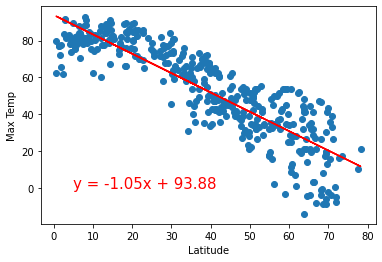

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(5,0))

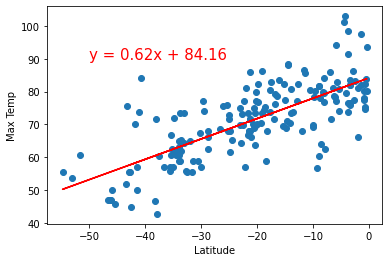

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(-50,90))

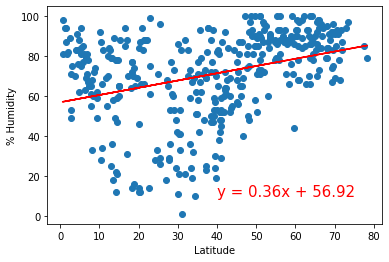

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

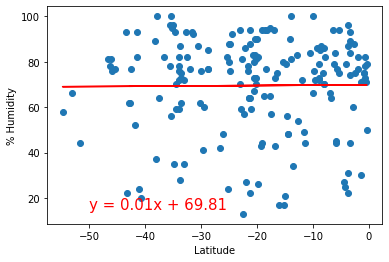

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,15))

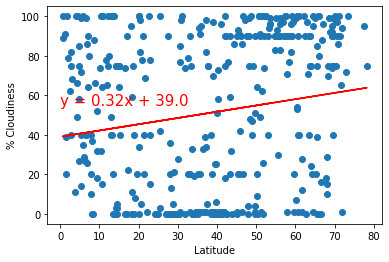

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(0,55))

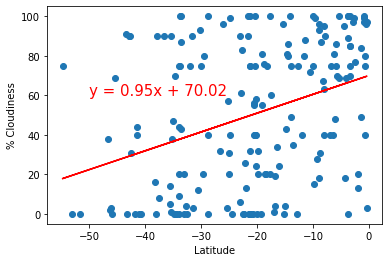

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

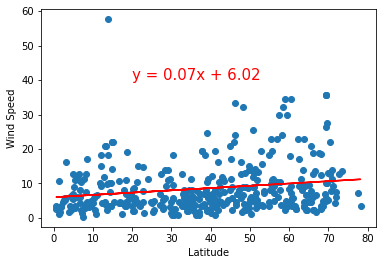

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(20,40))

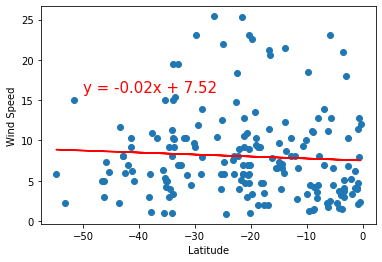

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,16))